In [12]:
#KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


#scale 
scaler = StandardScaler() #initialise
df = pd.read_csv("Wholesale customers data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
#fit_transform data
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [14]:
#initialize KMeans & fit scaled data into kmeans 
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

In [15]:
#inertia/SSE measures how well a data was clustered by kmeans
kmeans.inertia_

3115.261052941441

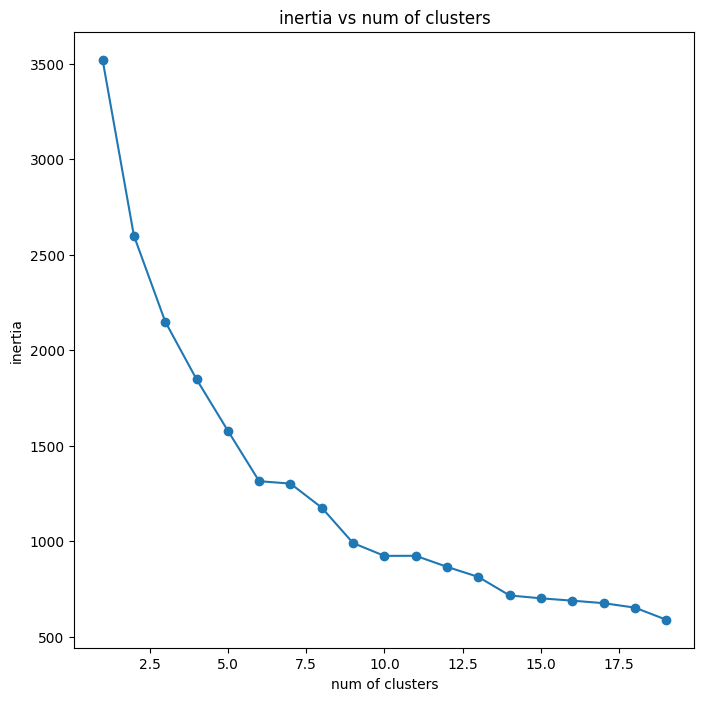

In [16]:
SSE = []
for num_clusters in range(1,20):
    kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++') #initialize
    kmeans.fit(scaled_data)                   #fit scaled data onto kmeans var
    SSE.append(kmeans.inertia_)
    
plt.figure(figsize=(8,8))
plt.plot(range(1,20), SSE, marker = 'o')
plt.xlabel('num of clusters')
plt.ylabel('inertia')
plt.title('inertia vs num of clusters')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++') #initialize
kmeans.fit(scaled_data)                         #fit scaled data onto kmeans var
predictions = kmeans.predict(scaled_data)       #predict using scaled_data

frame = pd.DataFrame(scaled_data)
frame['cluster'] = predictions
frame['cluster'].value_counts()

cluster
1    209
3     97
4     92
0     35
2      7
Name: count, dtype: int64